In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('/content/STOCK_NVDA.csv')
sorted_data = df.sort_values(by='Date', ascending=True)
sorted_data

,Date,Open,High,Low,Close,Volume
122,01/02/2024,49.24,49.30,47.60,48.17,"411,254,216"
121,01/03/2024,47.49,48.18,47.32,47.57,"320,896,187"
120,01/04/2024,47.77,48.50,47.51,48.00,"306,534,877"
119,01/05/2024,48.46,49.55,48.31,49.10,"415,039,296"
118,01/08/2024,49.51,52.28,49.48,52.25,"642,509,874"
...,...,...,...,...,...,...
4,06/21/2024,127.12,130.63,124.30,126.57,"655,484,688"
3,06/24/2024,123.24,124.46,118.04,118.11,"476,060,906"
2,06/25/2024,121.20,126.50,119.32,126.09,"425,787,500"
1,06/26/2024,126.13,128.12,122.60,126.40,"362,975,906"


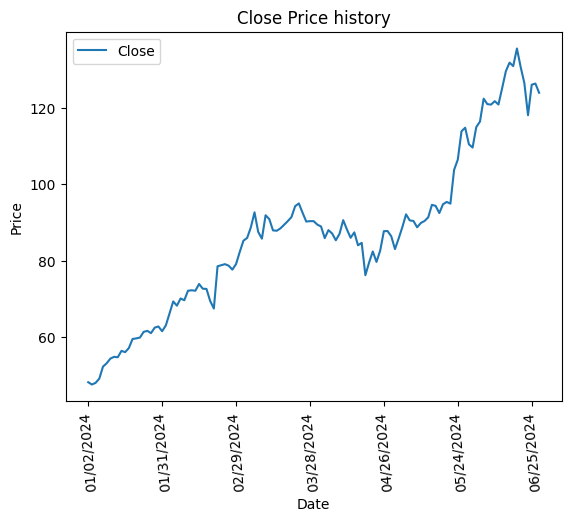

In [ ]:
sorted_data.plot(x='Date', y='Close')
plt.xticks(rotation=95)
plt.title('Close Price history')
plt.ylabel('Price')
plt.show()

In [ ]:
def convert_string_to_float(s):
    try:
        # Remove any commas from the string
        s = str(s)  # Convert to string if it's not already
        s = s.replace(",", "")
        # Convert the string to a float
        return float(s)
    except ValueError:
        return None
for col in df.columns:
  df[col] = df[col].apply(convert_string_to_float)

In [ ]:
model = RandomForestRegressor()

X = df[["Open",'High','Low','Volume']]
# Keep the last rows for test
X = X[:int(len(df)-2)]

# Target would be the close price of tomorrow ( next day data)
y = df['Close'].shift(-1)
y = y[:int(len(df)-2)]

In [ ]:
model.fit(X,y)

RandomForestRegressor()

In [ ]:
print('model score',model.score(X,y))

model score 0.9986369143284829


In [ ]:
# test data, unseen data, the last two rows of data ( second two last rows).
new_data = df[["Open",'High','Low','Volume']].tail(2)[0:1]
prediction = model.predict(new_data)
print('model predicted close price ', prediction)
print('Actual close Price', df[['Close']].tail(1).values[0][0])


model predicted close price  [48.1212]
Actual close Price 48.17
